In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import gmaps
import gmaps.geojson_geometries
from config import (gkey)

In [36]:
csv_path_eced = "input_data/Energy Census and Economic Data US 2010-2014.csv"
df_eced = pd.read_csv(csv_path_eced)
df_eced.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [37]:
#Import data set from EIA Table 1
csv_path_1 = "input_data/table1.csv"
df_1 = pd.read_csv(csv_path_1)
df_1.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,110.5,114.9,121.7,126.2,124.2,132.0,138.1,134.9,134.2,...,120.7,133.5,130.6,123.8,121.5,123.8,120.6,115.5,109.7,113.5
1,Alaska,34.7,35.3,36.8,36.6,36.4,41.1,42.0,42.1,43.2,...,38.0,39.0,38.8,38.3,36.2,35.2,36.3,35.1,34.6,35.2
2,Arizona,63.2,64.1,66.9,69.2,71.9,66.8,68.7,71.8,76.8,...,93.8,95.7,93.8,91.8,95.7,93.6,91.3,87.4,86.5,90.4
3,Arkansas,51.2,50.1,51.7,50.8,54.7,58.1,60.7,59.6,61.1,...,61.7,66.1,67.6,66.3,68.8,69.4,59.5,62.7,64.6,71.5
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,368.0,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0


In [31]:
# Establish filepath for U.S. energy census, GDP, and economic data
eiaGHGbysector_path = "input_data/pennsylvaniabysector_reformatted.xlsx"

# Import the books.csv file as a DataFrame as a multi-index data frame
# Ref: https://stackoverflow.com/questions/35300099/reading-excel-sheet-as-multiindex-dataframe-through-pd-read-excel
#ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
eia_PAbysector_df = pd.read_excel(eiaGHGbysector_path, index_col=[0,1])
eia_PAbysector_df.head()

1980    1981    1982    1983    1984  \
Sector             Fuel Type                                                    
Residential Sector Coal                 0.728   0.745   0.681   0.552   0.689   
                   Petroleum Products  13.155  11.503  10.084   9.769  12.281   
                   Natural Gas         15.634  15.497  14.860  13.774  14.555   
                   Total               29.518  27.745  25.624  24.096  27.525   
Commercial Sector  Coal                 2.677   3.293   3.249   2.849   2.883   

                                         1985    1986    1987    1988    1989  \
Sector             Fuel Type                                                    
Residential Sector Coal                 0.631   0.770   0.874   0.751   0.751   
                   Petroleum Products  11.943  10.586  10.621  11.329  11.998   
                   Natural Gas         13.436  14.009  13.807  14.733  14.948   
                   Total               26.010  25.365  25.301  26.813  27.698   
Commercial Sector  Coal                 2.198   2.532   2.867   2.614   2.767   

                                       ...    2009    2010    2011    2012  \
Sector             Fuel Type           ...                                   
Residential Sector Coal                ...   0.000   0.000   0.000   0.000   
                   Petroleum Products  ...   7.247   7.844   7.283   6.284   
                   Natural Gas         ...  12.563  12.301  12.103  10.929   
                   Total               ...  19.810  20.146  19.387  17.214   
Commercial Sector  Coal                ...   0.472   0.444   0.408   0.309   

                                         2013    2014    2015    2016    2017  \
Sector             Fuel Type                                                    
Residential Sector Coal                 0.000   0.000   0.000   0.000   0.000   
                   Petroleum Products   7.041   8.040   7.576   6.498   6.371   
                   Natural Gas         12.919  14.206  13.108  11.925  12.107   
                   Total               19.960  22.246  20.684  18.423  18.478   
Commercial Sector  Coal                 0.289   0.289   0.184   0.097   0.061   

                                         2018  
Sector             Fuel Type                   
Residential Sector Coal                 0.000  
                   Petroleum Products   7.648  
                   Natural Gas         13.936  
                   Total               21.585  
Commercial Sector  Coal                 0.034  

[5 rows x 39 columns]

In [39]:
#importing data from the dataframes 
worldbank_df = pd.read_csv("input_data/cleanworlddata.csv") #has country's per capita data from 1960-2016 
eiapercapita_df = pd.read_csv("input_data/eia.csv") #has states per capita data from 1990-2018, with percent and absolute changes noted

In [56]:
# Filepath for data file
facility_csv = "input_data/PA_facility_pollution.csv"

# Read the csv file
facility_data = pd.read_csv(facility_csv)

# Display the data table for preview
facility_data.head()

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,...,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
0,1.10E+11,3M ASTON,11432.0,NaN,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,...,NaN,19014CSTMC50MIL,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
1,1.10E+11,A P GREEN REFRACTORIES INC SPROUL PA PLANT,6709.0,NaN,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,...,NaN,16682GNRLRPOBOX,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
2,1.10E+11,ABERDEEN ROAD CO,NaN,NaN,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,...,NaN,17310HRCLTABERD,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
3,1.10E+11,LAKE REGION MEDICAL,1226.0,NaN,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,...,NaN,19426NFRMT200WE,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
4,1.10E+11,ACCURIDE ERIE,14007.0,NaN,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,...,NaN,16503KWLP 1015E,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN


Text(5000000, 0.5, 'r = 0.85')

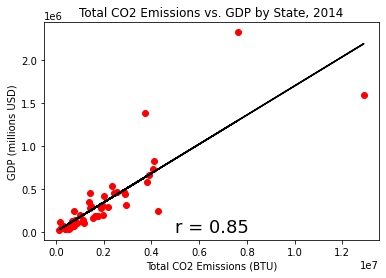

In [15]:
#Plot CO2 emissions vs. GDP for 2014 for all states; omit US total
df_scatter = df_eced.loc[(df_eced["StateCodes"]!="US")]
x_vals=df_scatter["TotalC2014"]
y_vals=df_scatter["GDP2014"]
plt.scatter(x_vals, y_vals, marker="o", color = "red")
cg_slope, cg_int, cg_r, cg_p, cg_std_err = st.linregress(x_vals, y_vals)
cg_fit = cg_slope * x_vals + cg_int
plt.title("Total CO2 Emissions vs. GDP by State, 2014")
plt.xlabel("Total CO2 Emissions (BTU)")
plt.ylabel("GDP (millions USD)")
plt.plot(x_vals, cg_fit, color = "black")
plt.annotate(f"r = {round(cg_r,2)}", (5000000, 0.5), fontsize=18)

In [17]:
#Show top CO2 contributors sorted by 2014 (relvant to other data sets)
df_sort1=df_1.sort_values("2014", ascending=False)
df_sort1.head(5)

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
43,Texas,578.4,574.2,578.3,594.9,597.5,600.2,645.2,667.8,674.8,...,583.3,620.6,638.3,626.3,657.5,664.1,659.7,663.8,678.9,701.9
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,368.0,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0
38,Pennsylvania,263.9,256.3,265.1,268.9,266.2,268.7,274.7,275.9,264.9,...,243.7,255.7,248.4,237.5,247.4,247.1,230.7,217.8,217.9,221.6
13,Illinois,191.9,191.9,187.6,204.1,204.2,208.3,222.1,225.4,215.6,...,226.6,231.6,230.4,217.5,231.0,234.1,216.4,204.8,203.2,210.4
35,Ohio,246.1,244.5,249.0,253.6,249.9,252.3,264.8,260.3,258.8,...,236.3,248.5,236.7,216.6,231.0,232.9,214.0,207.7,206.9,208.8


In [18]:
#Flip data set to show change over time
df_state = df_sort1.set_index("State")
df_top10 = df_state.head(5)
df_flip = df_top10.transpose()
df_flip.head(10)

State,Texas,California,Pennsylvania,Illinois,Ohio
1990,578.4,359.2,263.9,191.9,246.1
1991,574.2,346.7,256.3,191.9,244.5
1992,578.3,351.1,265.1,187.6,249.0
1993,594.9,340.4,268.9,204.1,253.6
1994,597.5,356.6,266.2,204.2,249.9
1995,600.2,345.4,268.7,208.3,252.3
1996,645.2,344.0,274.7,222.1,264.8
1997,667.8,346.5,275.9,225.4,260.3
1998,674.8,357.1,264.9,215.6,258.8
1999,655.4,360.6,263.3,225.5,257.8


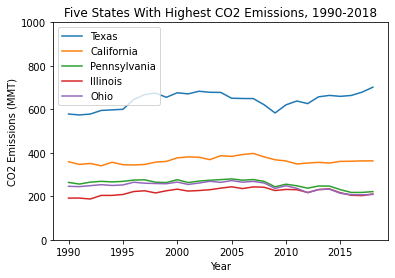

In [19]:
#Emissions have been largely constant over the given time interval
df_flip.plot(kind="line")
plt.title("Five States With Highest CO2 Emissions, 1990-2018")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (MMT)")
plt.ylim(0, 1000)
plt.legend(loc="upper left")

In [20]:
#Calculate individual state emissions totals across given years
df_1["Total"]=df_1.iloc[:, -51:-1].sum(axis=1)
df_1.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Alabama,110.5,114.9,121.7,126.2,124.2,132.0,138.1,134.9,134.2,...,133.5,130.6,123.8,121.5,123.8,120.6,115.5,109.7,113.5,3651.8
1,Alaska,34.7,35.3,36.8,36.6,36.4,41.1,42.0,42.1,43.2,...,39.0,38.8,38.3,36.2,35.2,36.3,35.1,34.6,35.2,1123.5
2,Arizona,63.2,64.1,66.9,69.2,71.9,66.8,68.7,71.8,76.8,...,95.7,93.8,91.8,95.7,93.6,91.3,87.4,86.5,90.4,2382.4
3,Arkansas,51.2,50.1,51.7,50.8,54.7,58.1,60.7,59.6,61.1,...,66.1,67.6,66.3,68.8,69.4,59.5,62.7,64.6,71.5,1711.8
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0,10181.5


In [22]:
#Total emissions for top 5 contributors and total for remaining states
total_TX = df_flip["Texas"].sum()
total_CA = df_flip["California"].sum()
total_PA = df_flip["Pennsylvania"].sum()
total_IL = df_flip["Illinois"].sum()
total_OH = df_flip["Ohio"].sum()

total_US = df_1["Total"].sum()
total_rem = total_US - (total_TX + total_CA + total_PA + total_IL + total_OH)

Text(0, 0.5, '% of Total CO2 (MMT)')

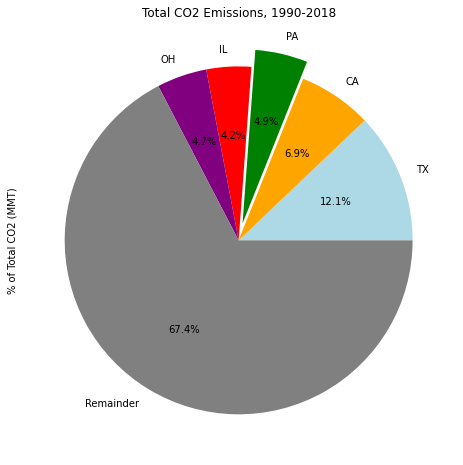

In [23]:
#Top 5 states represent 32.6% of CO2 emissions in these data
states = ["TX", "CA", "PA", "IL", "OH", "Remainder"]
totals = [total_TX, total_CA, total_PA, total_IL, total_OH, total_rem]
colors = ["lightblue","orange","green","red","purple", "gray"]
explode = [0, 0, 0.1, 0, 0, 0]

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(totals, labels=states, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Total CO2 Emissions, 1990-2018")
plt.ylabel("% of Total CO2 (MMT)")

In [24]:
#Separate years relevant to other data sets
df_2014=df_1[["State","2010","2011","2012", "2013", "2014"]]
df_2014.head()

,State,2010,2011,2012,2013,2014
0,Alabama,133.5,130.6,123.8,121.5,123.8
1,Alaska,39.0,38.8,38.3,36.2,35.2
2,Arizona,95.7,93.8,91.8,95.7,93.6
3,Arkansas,66.1,67.6,66.3,68.8,69.4
4,California,362.7,348.6,353.1,356.0,353.1


In [25]:
#Sum of years in data slice
df_2014["Total"]=df_2014.iloc[:, -5:-1].sum(axis=1)
df_2014.head()

<ipython-input-25-320a4ae59131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014["Total"]=df_2014.iloc[:, -5:-1].sum(axis=1)


,State,2010,2011,2012,2013,2014,Total
0,Alabama,133.5,130.6,123.8,121.5,123.8,509.4
1,Alaska,39.0,38.8,38.3,36.2,35.2,152.3
2,Arizona,95.7,93.8,91.8,95.7,93.6,377.0
3,Arkansas,66.1,67.6,66.3,68.8,69.4,268.8
4,California,362.7,348.6,353.1,356.0,353.1,1420.4


In [26]:
df_2014_flip = df_2014.set_index("State").transpose()
df_2014_flip.head(6)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,133.5,39.0,95.7,66.1,362.7,95.9,36.3,11.3,3.2,242.8,...,15.1,110.0,620.6,64.0,5.9,108.9,73.5,101.3,98.6,65.5
2011,130.6,38.8,93.8,67.6,348.6,92.2,34.9,12.3,3.1,229.7,...,14.7,106.5,638.3,64.5,5.8,100.0,68.6,98.6,97.8,64.3
2012,123.8,38.3,91.8,66.3,353.1,91.1,34.1,13.4,2.7,223.4,...,15.0,100.1,626.3,61.8,5.5,98.0,68.3,92.9,90.6,66.6
2013,121.5,36.2,95.7,68.8,356.0,91.8,34.9,13.1,2.8,222.5,...,15.5,98.6,657.5,67.2,5.8,105.3,73.1,95.1,101.3,68.8
2014,123.8,35.2,93.6,69.4,353.1,92.3,35.2,12.8,3.0,228.3,...,15.5,104.1,664.1,65.5,5.9,104.4,71.6,100.8,101.5,65.8
Total,509.4,152.3,377.0,268.8,1420.4,371.0,140.2,50.1,11.8,918.4,...,60.3,415.2,2542.7,257.5,23.0,412.2,283.5,387.9,388.3,265.2


In [27]:
total_TX14=df_2014_flip.loc["Total","Texas"]
total_CA14=df_2014_flip.loc["Total","California"]
total_PA14=df_2014_flip.loc["Total","Pennsylvania"]
total_IL14=df_2014_flip.loc["Total","Illinois"]
total_OH14=df_2014_flip.loc["Total","Ohio"]

total_US14=df_2014_flip.loc["Total",:].sum()
total_rem14=total_US14 - (total_TX14 + total_CA14 + total_PA14 + total_IL14 + total_OH14)

Text(0, 0.5, '% of Total CO2 (MMT)')

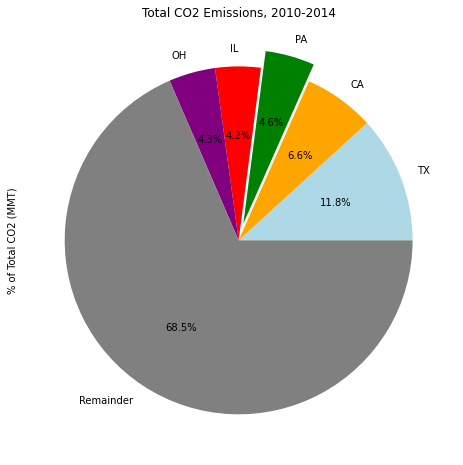

In [28]:
#Top 5 states account for 31.8% of emissions from 2010-2014
states = ["TX", "CA", "PA", "IL", "OH", "Remainder"]
totals = [total_TX14, total_CA14, total_PA14, total_IL14, total_OH14, total_rem14]
colors = ["lightblue","orange","green","red","purple", "gray"]
explode = [0, 0, 0.1, 0, 0, 0]

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(totals, labels=states, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Total CO2 Emissions, 2010-2014")
plt.ylabel("% of Total CO2 (MMT)")

In [29]:
#Find average state consumption
all50_2014=df_2014["Total"].sum()
all50_2014avg=all50_2014/51
all50_2014avg

423.0666666666667

Text(0, 0.5, 'CO2 Emissions (MMT)')

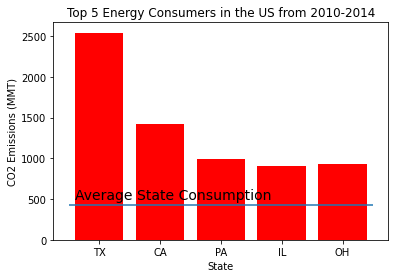

In [30]:
yvalues = [total_TX14, total_CA14, total_PA14, total_IL14, total_OH14]
labels = ["TX", "CA", "PA", "IL", "OH"]
x_axis = np.arange(len(yvalues))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, yvalues, color="red", align="center")
plt.xticks(tick_locations, labels)
plt.title("Top 5 Energy Consumers in the US from 2010-2014")
plt.hlines(y=all50_2014avg, xmin=-0.5, xmax=4.5)
plt.annotate("Average State Consumption", (-0.4, 500), fontsize=14)
plt.xlabel("State")
plt.ylabel("CO2 Emissions (MMT)")

In [32]:
#To maintain consistency with the facility level analysis, the year 2014 was isolated in this dataset
eia_PAbysector_2014df = pd.DataFrame(eia_PAbysector_df[2014])
# eia_bysector_2014df.loc[("Residential Sector", "Natural Gas"), 2014]
eia_PAbysector_2014df

2014
Sector                                         Fuel Type                                                 
Residential Sector                             Coal                                              0.000000
                                               Petroleum Products                                8.040000
                                               Natural Gas                                      14.206000
                                               Total                                            22.246000
Commercial Sector                              Coal                                              0.289000
                                               Petroleum Products                                2.013000
                                               Natural Gas                                       8.900000
                                               Total                                            11.202000
Industrial Sector                              Coal                                             20.693000
                                               Petroleum Products                               10.145000
                                               Natural Gas                                      22.265000
                                               Total                                            53.103000
Transportation Sector                          Coal                                              0.000000
                                               Petroleum Products                               58.422000
                                               Natural Gas                                       2.369000
                                               Total                                            60.790000
Electric Power Sector                          Coal                                             77.778000
                                               Petroleum Products                                0.536000
                                               Natural Gas                                      21.452000
                                               Total                                            99.766000
Grand Total                                    Grand Total                                     247.108000
Fuel Totals                                    Coal                                             98.760000
                                               Petroleum Products                               79.156000
                                               Natural Gas                                      69.191000
State allocation of national-level discrepancy State allocation of national-level discrepancy   -0.018811
Total with discrepancy                         Total with discrepancy                          247.088859

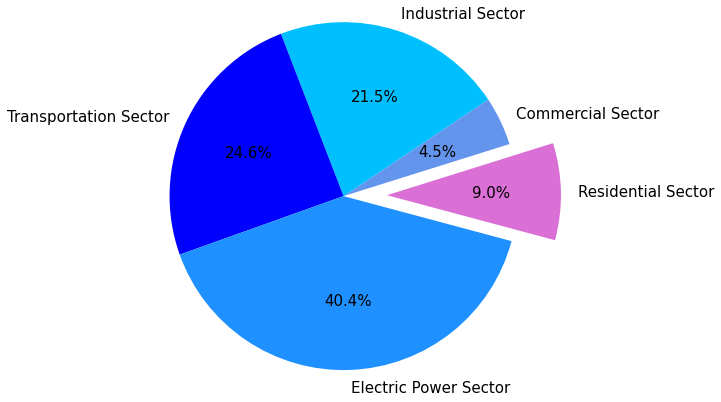

In [33]:
#Demonstrating fossil fuel emissions/consumption by sector using pie chart vizualization 
#ref: https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

pie_values = [eia_PAbysector_2014df.loc[("Residential Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Commercial Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Industrial Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Transportation Sector", "Total"), 2014], 
         eia_PAbysector_2014df.loc[("Electric Power Sector", "Total"), 2014]]

pie_labels = ["Residential Sector", "Commercial Sector","Industrial Sector", "Transportation Sector", "Electric Power Sector"]
colors = ["orchid", "cornflowerblue", "deepskyblue", "blue", "dodgerblue"]
explode = (0.5,0,0,0,0)

plt.pie(pie_values, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", startangle = 345, radius = 2, textprops={'fontsize':15})
plt.savefig("output_images/totalemissionbysectorPA.png")
plt.show()

In [34]:
#Gathering emission/consumption by type per sector and storing in lists for bar chart visualization
coal = []
petroleum = []
naturalgas = []
catch = False

for row in eia_PAbysector_2014df[2014]: 
    
    indicies = eia_PAbysector_2014df.loc[eia_PAbysector_2014df[2014] == row, 2014].index.to_list()
    
    for index in indicies: 
        
#         print(index)

        if (index[0] == "Residential Sector"): 

#             print('IF check')

            if (index[1] == "Coal") & (catch == False):
                
#                 print('IF check')
                catch = True
                coal.append(row)
        
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)
                
        if index[0] == "Commercial Sector": 

            if index[1] == "Coal":

                coal.append(row)
                
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)

        if index[0] == "Industrial Sector":
            
#             print('IF check')
            if index[1] == "Coal":

                coal.append(row)

            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)            
        
            if index[1] == "Total":
            
                catch = False
                
        if (index[0] == "Transportation Sector"): 

            if (index[1] == "Coal") & (catch == False):

                coal.append(row)

            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)

        if index[0] == "Electric Power Sector": 

            if index[1] == "Coal":

                coal.append(row)
                
            if (index[1] == "Petroleum Products"):
                
                petroleum.append(row)
                
            if (index[1] == "Natural Gas"):
                
                naturalgas.append(row)

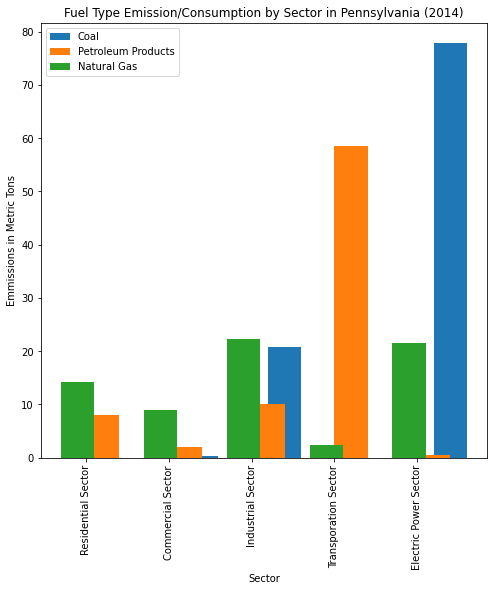

In [35]:
#Demonstrating fossil fuel emissions/consumption by sector and fuel type using bar graph visualization
#ref: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

sectors = ["Residential Sector", "Commercial Sector", "Industrial Sector", "Transporation Sector", "Electric Power Sector"]
x_axis = np.arange(len(sectors))
bar_width = 0.4
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.bar(x_axis + bar_width, coal, width=bar_width, label = 'Coal', align="edge")
plt.bar(x_axis + bar_width, petroleum, width=bar_width, label = 'Petroleum Products', align="center")
plt.bar(x_axis - 0.1, naturalgas, width=bar_width, label = 'Natural Gas', align="edge")

plt.xticks(x_axis + (bar_width/2), sectors, rotation=90)
plt.xlabel("Sector")
plt.ylabel("Emmissions in Metric Tons")
plt.title("Fuel Type Emission/Consumption by Sector in Pennsylvania (2014)")
plt.legend()
plt.savefig("output_images/emissiontypebysectorPA.png")
plt.show()

In [42]:
#cleaning up world data from worldbank 

world_df = worldbank_df.drop(["Indicator Name", "Indicator Code", "Country Code"], axis = 1)
nona_world_df = world_df.dropna() # this will drop any countries with missing data from any of the year, so will keep countries with complete data in the time period
nona_world_df = nona_world_df.set_index('Country Name') # such that calling specific ie. US will be easier 

average_emission = nona_world_df.T.mean()

world_90_16 = world_df[['Country Name','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014','2015','2016']]#might be useful in comparison to PA data does not have 2017-2018 that state has isolation 
w_nona_ns = world_90_16.set_index('Country Name').dropna() #dropping countries with na values 

world_ten14 = world_df[['Country Name','2010', '2011', '2012', '2013', '2014']] # this is isolating the world data to look at just 2010-2014 period for later comparison
w_nona_tf = world_ten14.dropna() #dropping countries with na values



US_all = nona_world_df.loc['United States'] # Just the US CO2 emission per capita
US_ten14 = nona_world_df.loc['United States', ['2010','2011', '2012','2013','2014']] # US 2010-2014 emission

In [43]:
#Lets Clean up the EIA Data: holds data per capita for each state from 1990 - 2018 
eiapercapita_df.head()

# LOOKING AT IT OVERALL 
percent_absolute = eiapercapita_df[['State','1990-2018 Percent','1990-2018 Absolute', '1990-2018 Percent.1', '1990-2018 Absolute.1' ]] #isolating these columns to be dropped later from the dataframe
percent_absolute = percent_absolute.rename(columns = {'1990-2018 Percent.1':'2017-2018 Percent', '1990-2018 Absolute.1':'2017-2018 Absolute'}) #renaming these columns because the column heading is wrong for the last two columns 
PA_perAbs = percent_absolute.iloc[38, :]
print(PA_perAbs) # This is only important to highlight PA's overall change and isolated year change from 2017-18

State                 Pennsylvania
1990-2018 Percent          -21.90%
1990-2018 Absolute            -4.9
2017-2018 Percent            1.60%
2017-2018 Absolute             0.3
Name: 38, dtype: object


In [44]:
# For more details 
eia = eiapercapita_df.set_index("State") # reindexing by state's name 
eia = eia.drop(['1990-2018 Percent','1990-2018 Absolute', '1990-2018 Percent.1', '1990-2018 Absolute.1'], axis=1) #droping the total change and report
PA_all = eia.loc['Pennsylvania'] # isolating just PA's data for the time period
PA_ten14 = eia.loc['Pennsylvania', ['2010','2011', '2012','2013','2014']] #PA just 2010-2014

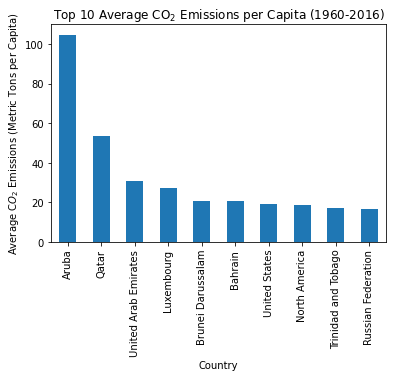

In [48]:
#Visualizing 

#Top 10 Average for all countires with complete data
top_ten_measured = average_emission.sort_values(ascending=False).head(10) #average emission over 56 years top 10 per capita
top_ten_measured.plot.bar()
plt.ylabel("Average C$O_2$ Emissions (Metric Tons per Capita)")
plt.xlabel('Country')
plt.title("Top 10 Average CO$_2$ Emissions per Capita (1960-2016)") # Note this removed any countires without complete data.
plt.savefig('output_images/top10sixtiestosixteen.png')
#United States is 7th

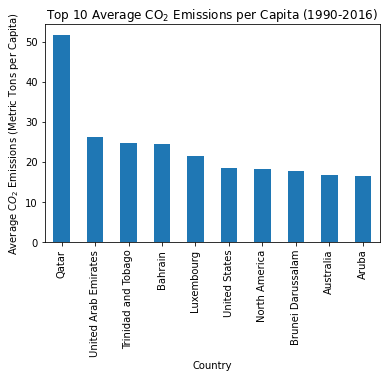

In [49]:
# Top 10 average C02 emission per capita 1990 - 2016
average_nsixteen = w_nona_ns.T.mean().sort_values(ascending=False).head(10) #
average_nsixteen.plot.bar()
plt.ylabel("Average C$O_2$ Emissions (Metric Tons per Capita)")
plt.xlabel('Country')
plt.title("Top 10 Average CO$_2$ Emissions per Capita (1990-2016)") # Note this removed any countires without complete data.
plt.savefig('output_images/top10avg1990_2016.png')

# US moved to 6th place

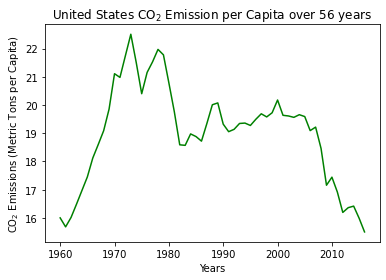

In [50]:
# United States Emission 1960-2016
US_all.plot.line(color ="green")

plt.xlabel("Years")
plt.ylabel("CO$_2$ Emissions (Metric Tons per Capita)")
plt.title("United States CO$_2$ Emission per Capita over 56 years")

plt.savefig('output_images/usemmissionover56years.png')

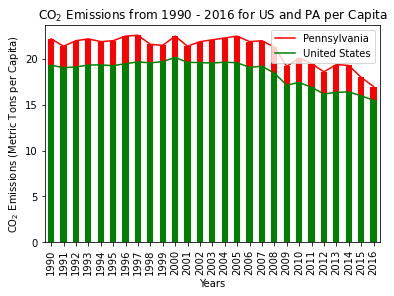

In [51]:
# US and PA comparison from 1990 - 2016

PA_all[:27].plot.line(color='red', legend='PA')
US_all[30:,].plot.line(color='green', legend = 'United States')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.xlabel('Years')
plt.title('CO$_2$ Emissions from 1990 - 2016 for US and PA per Capita')
PA_all[:27].plot.bar(color='red')
US_all[30:,].plot.bar(color='green')

plt.savefig('output_images/USandPAcomparion1990_2016.png')

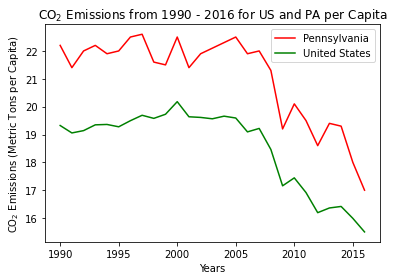

In [52]:
# Same as above just different way to visualize it

PA_all[:27].plot.line(color='red', legend='PA')
US_all[30:,].plot.line(color='green', legend = 'United States')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.xlabel('Years')
plt.title('CO$_2$ Emissions from 1990 - 2016 for US and PA per Capita')

plt.savefig('output_images/USandPAcomparion1990_2016_without_bar.png')

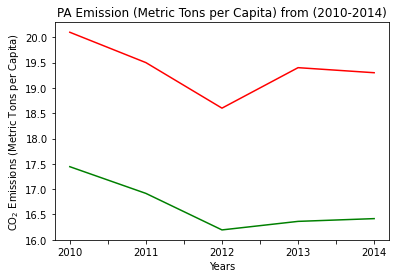

In [53]:
#PA 2010 - 2014 for comparison

PA_ten14.plot.line(color ='red')
US_all[50:55].plot.line(color='green')
plt.xlabel('Years')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.title("PA Emission (Metric Tons per Capita) from (2010-2014)")

plt.savefig('output_images/USandPAcomparion2010_2014.png')


#note the unusal dip at 2012 that megan also mentioned in her plot

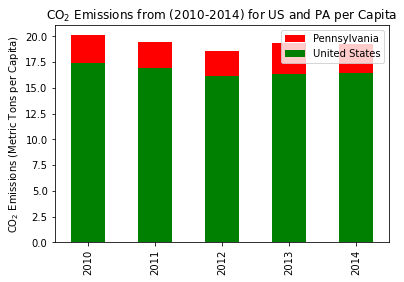

In [54]:
PA_ten14.plot.bar(color='red', legend="PA")
US_all[50:55].plot.bar(color='green' ,legend='US')
plt.ylabel('CO$_2$ Emissions (Metric Tons per Capita)')
plt.title('CO$_2$ Emissions from (2010-2014) for US and PA per Capita')

plt.savefig('output_images/USandPAcomparion2010_2014_with_bar.png')

In [57]:
# Drop unnecessary columns
drop_df = facility_data.drop(facility_data.columns[[0, 2, 3, 11, 12, 13, 14,
                                                   18, 19, 20, 21, 22, 28, 29, 30,
                                                   31, 32, 33, 34, 35, 36, 37, 38,
                                                   39, 40, 41, 42]], axis=1)
drop_df.head()

,FacilityName,Latitude,Longitude,LocationAddress,City,State,ZIP,County,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,GHG_Direct_Emissions_14_in_metric_tons,GHG_Direct_Emissions_13_in_metric_tons,GHG_Direct_Emissions_12_in_metric_tons,GHG_Direct_Emissions_11_in_metric_tons,GHG_Direct_Emissions_10_in_metric_tons
0,3M ASTON,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,DELAWARE,NaN,NaN,3M CO,Not reported,Not reported,Not reported,Not reported,Not reported
1,A P GREEN REFRACTORIES INC SPROUL PA PLANT,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,BLAIR,NaN,NaN,A P GREEN INDUSTRIES INC.,Not reported,Not reported,Not reported,Not reported,Not reported
2,ABERDEEN ROAD CO,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,YORK,NaN,NaN,ABERDEEN ROAD CO,Not reported,Not reported,Not reported,Not reported,Not reported
3,LAKE REGION MEDICAL,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,MONTGOMERY,NaN,NaN,ACCELLENT INC.,Not reported,Not reported,Not reported,Not reported,Not reported
4,ACCURIDE ERIE,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,ERIE,NaN,NaN,ACCURIDE CORP,Not reported,Not reported,Not reported,Not reported,Not reported


In [58]:
# Rename GHG Emissions columns
GHG_df = drop_df.rename(columns={"GHG_Direct_Emissions_14_in_metric_tons": "GHG_14",
                                   "GHG_Direct_Emissions_13_in_metric_tons": "GHG_13",
                                   "GHG_Direct_Emissions_12_in_metric_tons": "GHG_12",
                                   "GHG_Direct_Emissions_11_in_metric_tons": "GHG_11",
                                   "GHG_Direct_Emissions_10_in_metric_tons": "GHG_10"})
GHG_df.head()

,FacilityName,Latitude,Longitude,LocationAddress,City,State,ZIP,County,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,GHG_14,GHG_13,GHG_12,GHG_11,GHG_10
0,3M ASTON,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,DELAWARE,NaN,NaN,3M CO,Not reported,Not reported,Not reported,Not reported,Not reported
1,A P GREEN REFRACTORIES INC SPROUL PA PLANT,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,BLAIR,NaN,NaN,A P GREEN INDUSTRIES INC.,Not reported,Not reported,Not reported,Not reported,Not reported
2,ABERDEEN ROAD CO,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,YORK,NaN,NaN,ABERDEEN ROAD CO,Not reported,Not reported,Not reported,Not reported,Not reported
3,LAKE REGION MEDICAL,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,MONTGOMERY,NaN,NaN,ACCELLENT INC.,Not reported,Not reported,Not reported,Not reported,Not reported
4,ACCURIDE ERIE,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,ERIE,NaN,NaN,ACCURIDE CORP,Not reported,Not reported,Not reported,Not reported,Not reported


In [59]:
# Create new df to count # of "Not Reported" by year

# Replace "Not reported" in GHG years with 1.01
not_reported_df = GHG_df.replace(to_replace="Not reported", value=1.01)

# Count how many 1.01 = number of facilities that did not report by year
count_14 = ((not_reported_df["GHG_14"]==1.01).value_counts())
count_13 = ((not_reported_df["GHG_13"]==1.01).value_counts())
count_12 = ((not_reported_df["GHG_12"]==1.01).value_counts())
count_11 = ((not_reported_df["GHG_11"]==1.01).value_counts())
count_10 = ((not_reported_df["GHG_10"]==1.01).value_counts())

print(count_14)
print(count_13)
print(count_12)
print(count_11)
print(count_10)

True     1037
False     330
Name: GHG_14, dtype: int64
True     1055
False     312
Name: GHG_13, dtype: int64
True     1074
False     293
Name: GHG_12, dtype: int64
True     1090
False     277
Name: GHG_11, dtype: int64
True     1122
False     245
Name: GHG_10, dtype: int64


In [60]:
# Create DataFrame to display # of facilities that did not report
facility_report = [[2014, 1037, 330],
                   [2013, 1055, 312],
                   [2012, 1074, 293],
                   [2011, 1090, 277],
                   [2010, 1122, 245]]

GHG_reported_df = pd.DataFrame(facility_report, columns = ['Year', '# Facilities Not Reported', '# Facilities Reported'])

# Display DataFrame
GHG_reported_df

,Year,# Facilities Not Reported,# Facilities Reported
0,2014,1037,330
1,2013,1055,312
2,2012,1074,293
3,2011,1090,277
4,2010,1122,245


In [61]:
# Turn "Not reported" GHG Emissions into floats in order to chart/sum

# Replace "Not reported" in GHG years with 1.01
total_GHG_df = GHG_df.replace(to_replace="Not reported", value=0)

# Turn GHG Emissions into floats
total_GHG_df["GHG_14"] = total_GHG_df["GHG_14"].astype(float)
total_GHG_df["GHG_13"] = total_GHG_df["GHG_13"].astype(float)
total_GHG_df["GHG_12"] = total_GHG_df["GHG_12"].astype(float)
total_GHG_df["GHG_11"] = total_GHG_df["GHG_11"].astype(float)
total_GHG_df["GHG_10"] = total_GHG_df["GHG_10"].astype(float)

# total_GHG_df

138463100.0
138548958.0
132013761.0
136593277.0
136820895.0


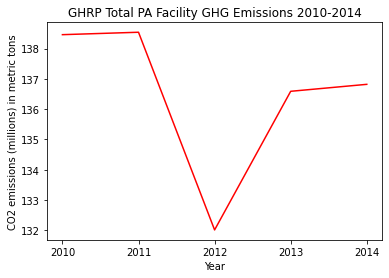

In [62]:
# Line trend plot showing Emissions over time

# Get the total sum of all years
print (total_GHG_df["GHG_10"].sum())
print (total_GHG_df["GHG_11"].sum())
print (total_GHG_df["GHG_12"].sum())
print (total_GHG_df["GHG_13"].sum())
print (total_GHG_df["GHG_14"].sum())

# Create list & dictionary for axis & plot points
years = np.arange(5)
total_emissions = [138.46, 138.54, 132.013, 136.59, 136.82]

# Label tick marks as years
tick_locations = [value for value in years]
plt.xticks(tick_locations, ["2010","2011", "2012", "2013", "2014"])

# Give our chart some labels and a tile
plt.title("GHRP Total PA Facility GHG Emissions 2010-2014")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (millions) in metric tons")

# Show Plot
plt.plot(years, total_emissions, color="red")

In [63]:
#Sum GHG Emissions for each row

#Create list of columns to sum
total_list = ["GHG_14", "GHG_13", "GHG_12", "GHG_11", "GHG_10"]

#Hold total of sums of columns in new column "Total_GHG_Emissions"
total_GHG_df["Total_GHG_Emissions"] = total_GHG_df[total_list].sum(axis=1)

#Display DataFrame
total_GHG_df.head()

,FacilityName,Latitude,Longitude,LocationAddress,City,State,ZIP,County,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,GHG_14,GHG_13,GHG_12,GHG_11,GHG_10,Total_GHG_Emissions
0,3M ASTON,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,DELAWARE,NaN,NaN,3M CO,0.0,0.0,0.0,0.0,0.0,0.0
1,A P GREEN REFRACTORIES INC SPROUL PA PLANT,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,BLAIR,NaN,NaN,A P GREEN INDUSTRIES INC.,0.0,0.0,0.0,0.0,0.0,0.0
2,ABERDEEN ROAD CO,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,YORK,NaN,NaN,ABERDEEN ROAD CO,0.0,0.0,0.0,0.0,0.0,0.0
3,LAKE REGION MEDICAL,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,MONTGOMERY,NaN,NaN,ACCELLENT INC.,0.0,0.0,0.0,0.0,0.0,0.0
4,ACCURIDE ERIE,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,ERIE,NaN,NaN,ACCURIDE CORP,0.0,0.0,0.0,0.0,0.0,0.0


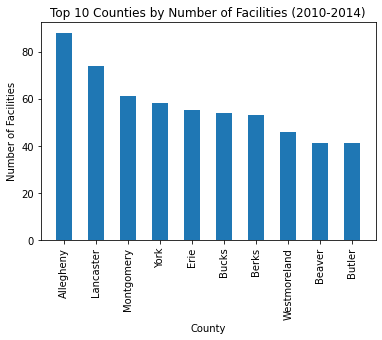

In [64]:
# Create bar plot showing Top 10 Counties by Total Number of Faciltiies

#Use groupby to group counties & create DataFrame
county_facilities_df = (total_GHG_df.groupby("County")["FacilityName"].count()).sort_values(ascending = False)
county_facilities = [['Allegheny', 88],
                     ['Lancaster', 74],
                     ['Montgomery', 61],
                     ['York', 58],
                     ['Erie', 55],
                     ['Bucks', 54],
                     ['Berks', 53],
                     ['Westmoreland', 46],
                     ['Beaver', 41],
                     ['Butler', 41]]

facility_county_count = pd.DataFrame(county_facilities, columns = ['County', 'Number of Facilities'])

# Create bar graph to display Top 10 Counties by Facilities Count
measurements = facility_county_count["Number of Facilities"]
x_axis = np.arange(len(county_facilities))
labels = facility_county_count["County"]

# Create a bar chart based upon the above data
plt.bar(x_axis, measurements, align="center", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels, rotation = 90)

# Give the chart a title, x label, and y label
plt.xlabel("County")
plt.ylabel("Number of Facilities")
plt.title("Top 10 Counties by Number of Facilities (2010-2014)")

#Show plot
plt.show()

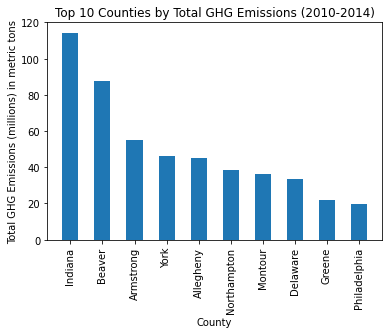

In [65]:
# Create bar plot showing highest count of facilities by Total Emissions
#Use groupby to group counties

#Use groupby to group counties & create DataFrame
county_emissions_df = (total_GHG_df.groupby("County")["Total_GHG_Emissions"].sum()).sort_values(ascending = False)

# Display Top 10 Counties by Total GHG Emissions
# county_emissions_df.head(10)

# Save Top 10 into List and create DataFrame
county_emissions = [['Indiana', 114.33],
                     ['Beaver',  87.37],
                     ['Armstrong', 54.98],
                     ['York', 46.32],
                     ['Allegheny', 44.96],
                     ['Northampton', 38.28],
                     ['Montour',  36.12],
                     ['Delaware',  33.32],
                     ['Greene',  22.18],
                     ['Philadelphia', 19.82]]

county_total_emissions_df = pd.DataFrame(county_emissions, columns = ['County', 'Total GHG Emissions'])

# Create bar graph to display Top 10 Counties by Facilities Count
measurements = county_total_emissions_df["Total GHG Emissions"]
x_axis = np.arange(len(county_emissions))
labels = county_total_emissions_df["County"]

# Create a bar chart based upon the above data
plt.bar(x_axis, measurements, align="center", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels, rotation =90)

# Give the chart a title, x label, and y label
plt.xlabel("County")
plt.ylabel("Total GHG Emissions (millions) in metric tons")
plt.title("Top 10 Counties by Total GHG Emissions (2010-2014)")

#Show plot
plt.show()

In [66]:
# Create map of total GHG emissions

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

#Only use rows that have float values
total_GHG_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

GHG_weight = total_GHG_df["Total_GHG_Emissions"]

# Store 'Lat' and 'Lng' into  locations 
locations = total_GHG_df[["Latitude", "Longitude"]].astype(float)

In [67]:
# Create a GHG Emissions Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=GHG_weight, 
                                 dissipating=False,max_intensity=1,
                                 point_radius = .04)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
# Add maps showing locations of all facilities

facilities_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
fig = gmaps.figure()
fig.add_layer(facilities_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
# Add maps showing only facilities that reported emissions
facilities_emissions = total_GHG_df[total_GHG_df["Total_GHG_Emissions"]!=0]
facilities_emissions_locations = facilities_emissions[["Latitude", "Longitude"]]

facilility_emissions_layer= gmaps.symbol_layer(
    facilities_emissions_locations, fill_color='red', stroke_color='red', scale=2
)
fig = gmaps.figure()
fig.add_layer(facilility_emissions_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# # PA county boundaries
# gmaps.geojson_geometries.geometry_metadata('us-counties')
# countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

# fig = gmaps.figure()

# geojson_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(geojson_layer)
# fig